In [1]:
import pandas as pd
import numpy as np
import openpyxl
import os

# 데이터 출처

- https://www.price.go.kr/tprice/portal/servicepriceinfo/dineoutprice/dineOutPriceList.do#
- http://www.krei.re.kr:18181/new_sub01
- https://kosis.kr/index/index.do
- https://www.ekapepia.com/priceComparison/poducerPrice/retail/periodPrice.do
- http://price.consumer.or.kr/DR1001/DR1004_01.php
- https://www.istans.or.kr/su/newSuTab.do?scode=S139
- https://www.atfis.or.kr/fip/front/M000000293/stats/foodindustry.do
- https://www.atfis.or.kr/fip/front/M000000217/board/view.do

In [2]:
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import datetime

In [3]:
# Matplotlib 한글 Font 설정 ---------
from matplotlib import font_manager as fm, rc

# 한글 Font 설정
font_path = '../Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [4]:
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

In [5]:
df1 = pd.read_csv('./Data/수급동향2022-07-19.csv')
df1

,Date,Type,Open,Close,Settlement,Volume
0,2022-07-18,Wheat,289.26,295.87,298.6300,72485
1,2022-07-18,Soybeans,543.15,549.95,550.1400,135075
2,2022-07-18,Corn,240.44,240.74,241.0300,223512
3,2022-07-15,Wheat,293.21,290.64,285.4000,79523
4,2022-07-15,Soybeans,542.88,534.98,538.6500,112050
...,...,...,...,...,...,...
38172,1972-01-04,Soybeans,0.00,0.00,111.9300,0
38173,1972-01-04,Corn,0.00,0.00,48.0808,0
38174,1972-01-03,Wheat,0.00,0.00,59.4797,0
38175,1972-01-03,Soybeans,0.00,0.00,112.5260,0


In [6]:
df2 = df1[df1['Date'] == '2020-12-31']

In [7]:
df1 = df1[df1.index < df2.index[0]]
df1.drop(['Open', 'Close', 'Volume'], axis=1, inplace= True)

C:\Users\User\AppData\Local\Temp\ipykernel_3972\1450675017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['Open', 'Close', 'Volume'], axis=1, inplace= True)


In [8]:
df1.head()

,Date,Type,Settlement
0,2022-07-18,Wheat,298.63
1,2022-07-18,Soybeans,550.14
2,2022-07-18,Corn,241.03
3,2022-07-15,Wheat,285.40
4,2022-07-15,Soybeans,538.65


In [9]:
df2 = df1[df1.Type == 'Wheat']
df2.reset_index(inplace=True)
df2.drop(135, inplace = True)
df2.reset_index(inplace=True)
df2.rename(columns = {'Settlement':'밀'}, inplace=True)
df2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3972\2817012196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(135, inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_3972\2817012196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {'Settlement':'밀'}, inplace=True)


,level_0,index,Date,Type,밀
0,0,0,2022-07-18,Wheat,298.63
1,1,3,2022-07-15,Wheat,285.40
2,2,6,2022-07-14,Wheat,292.11
3,3,9,2022-07-13,Wheat,293.30
4,4,12,2022-07-12,Wheat,294.50


In [10]:
df3 = df1[df1.Type == 'Soybeans']
df3.reset_index(inplace=True)
df3.rename(columns = {'Settlement':'대두', 'Date':'date'}, inplace=True)
df3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3972\438824561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns = {'Settlement':'대두', 'Date':'date'}, inplace=True)


,index,date,Type,대두
0,1,2022-07-18,Soybeans,550.14
1,4,2022-07-15,Soybeans,538.65
2,7,2022-07-14,Soybeans,540.77
3,10,2022-07-13,Soybeans,583.57
4,13,2022-07-12,Soybeans,585.23


In [11]:
df4 = df1[df1.Type == 'Corn']
df4.reset_index(inplace=True)
df4.drop([135, 136], inplace=True)
df4.reset_index(inplace=True)
df4.rename(columns = {'Settlement':'옥수수', 'Date':'date'}, inplace=True)
df4.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3972\4157394470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop([135, 136], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_3972\4157394470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.rename(columns = {'Settlement':'옥수수', 'Date':'date'}, inplace=True)


,level_0,index,date,Type,옥수수
0,0,2,2022-07-18,Corn,241.03
1,1,5,2022-07-15,Corn,237.88
2,2,8,2022-07-14,Corn,238.18
3,3,11,2022-07-13,Corn,291.33
4,4,14,2022-07-12,Corn,288.47


In [12]:
# df2.value_counts()
# df2[df2.Date == '2022-03-31']

In [13]:
# df4.value_counts()
# df4[df4.Date == '2022-02-03']

In [14]:
df1 = pd.concat([df2,df3,df4], axis=1)
df1.drop(['level_0', 'index', 'Type', 'date'], axis=1, inplace=True)

In [15]:
df1.set_index('Date', inplace=True)

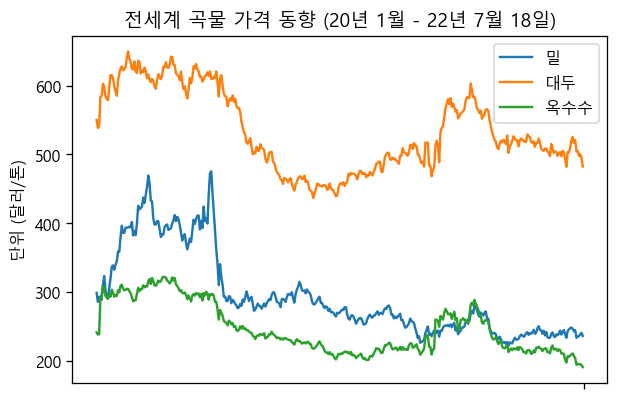

In [16]:
fig = plt.figure(dpi=115)
plt.plot(df1)
plt.xticks('')
plt.ylabel('단위 (달러/톤)')
plt.title('전세계 곡물 가격 동향 (20년 1월 - 22년 7월 18일)')
plt.legend(df1.columns)
plt.show()

## 분석

- 곡물 가격 폭등은 시기적으로 봤을 때 20년의 코로나, 22년 초의 우크라이나 전쟁의 영향이 더 컸다.
- 전체적으로 봤을 때는 코로나 사태와 우크라이나 전쟁의 영향으로 요동쳤던 곡물 가격이 정상화되는 중

In [17]:
df2 = pd.read_csv('./Data/지출목적별_소비자물가지수_품목포함__2020100__20220719174122.csv', encoding='euc_kr')
df2.drop('시도별', axis=1, inplace = True)
df2.set_index('지출목적별')
df2 = df2.transpose()
df2.rename(columns=df2.iloc[0],inplace=True)
df2 = df2.drop(df2.index[0])
df2

,0 총지수,01 식료품 및 비주류음료,01.1 식료품,01.2 비주류 음료,02.1 주류,11.1 음식 서비스
2020.01,100.09,97.16,96.98,99.67,100.44,99.63
2020.02,100.16,96.66,96.5,98.98,100.5,99.67
2020.03,99.94,98.06,97.97,99.4,99.6,99.62
2020.04,99.5,97.65,97.49,99.89,99.56,99.69
2020.05,99.44,98.45,98.34,99.87,99.88,99.84
2020.06,99.71,98.68,98.59,99.9,99.88,99.95
2020.07,99.63,99.15,99.09,100.04,99.96,99.98
2020.08,100.19,101.8,101.91,100.28,99.95,100.02
2020.09,100.74,104.79,105.12,100.14,100.22,100.26
2020.10,100.18,104.85,105.16,100.54,100.36,100.47


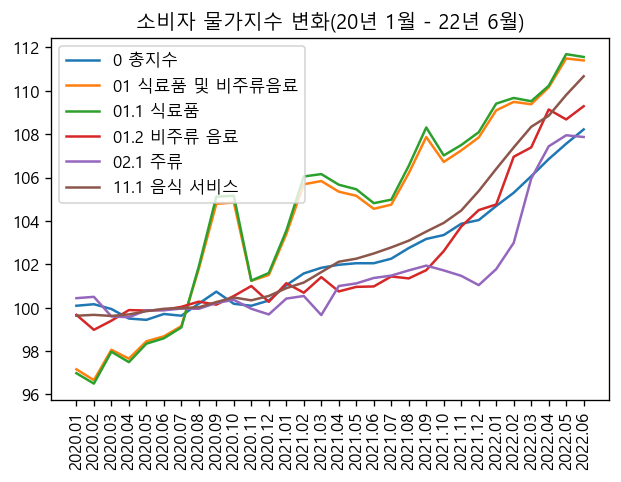

In [18]:
fig = plt.figure(dpi=120)
plt.plot(df2)
plt.xticks(rotation=90)
plt.title('소비자 물가지수 변화(20년 1월 - 22년 6월)')
plt.legend(df2.columns)
plt.show()

## 분석

- 식료품 관련 물가의 변동은 세계 곡물 가격의 변동과 연관이 없는 걸로 나타남
- 전반적으로 상승
- 20년 8월, 9월 식료품 물가 폭등의 원인은 장마와 태풍으로 인한 생산량 감소로 확인됨

In [19]:
# DIR = './Data/외식비/'         월별로 흩어진 엑셀 값을 통합 후 새로운 엑셀을 만드는 과정
# filelist = os.listdir(DIR)

In [20]:
# data = []

# for i in range(len(filelist)):
#     data.append(pd.read_csv(DIR + filelist[i], encoding='euc_kr')) 

# data[0].head()

In [21]:
# for i in range(len(data)):
#     data[i]['삼겹살'] = data[i]['삼겹살(환산후)'] 
#     data[i].drop(['지역', '삼겹살(환산전)', '삼겹살(환산후)'], axis=1, inplace=True)    
#     data[i].loc[16] = data[i].mean().to_list()
#     data[i].loc[16].round(0)
#     data[i].drop(range(16), inplace = True)
#     data[i].set_index('번호', inplace=True)

In [22]:
# data[0].info()

In [23]:
# df = pd.concat(data)
# df.reset_index(inplace=True)
# df.drop('번호', axis = 1, inplace=True)
# df

In [24]:
# df.to_csv('./Data/외식비.csv', encoding='utf-8')

In [25]:
df4 = pd.read_csv('./Data/외식비.csv')
df4.head()

,Unnamed: 0,냉면,비빔밥,김치찌개백반,자장면,삼계탕,칼국수,김밥,삼겹살
0,0,7981.8125,7694.6875,6685.2500,5171.0625,13387.125,6654.1250,2272.3125,13998.9375
1,1,8008.8750,7706.3125,6692.2500,5172.0625,13396.500,6664.9375,2288.2500,13927.2500
2,2,8004.7500,7707.4375,6682.8750,5179.5625,13396.500,6681.7500,2303.4375,13954.5000
3,3,8004.8125,7702.3750,6689.1250,5175.6875,13406.125,6681.7500,2312.1250,13953.5625
4,4,8036.3125,7722.8125,6695.0625,5170.5000,13406.125,6647.5000,2318.1250,14005.3750


In [26]:
df4 = df4.drop(['Unnamed: 0', '김밥', '삼계탕', '삼겹살'], axis=1)
df4.head()

,냉면,비빔밥,김치찌개백반,자장면,칼국수
0,7981.8125,7694.6875,6685.2500,5171.0625,6654.1250
1,8008.8750,7706.3125,6692.2500,5172.0625,6664.9375
2,8004.7500,7707.4375,6682.8750,5179.5625,6681.7500
3,8004.8125,7702.3750,6689.1250,5175.6875,6681.7500
4,8036.3125,7722.8125,6695.0625,5170.5000,6647.5000


In [27]:
times = pd.date_range(start = '2020-01', end = '2022-06', freq='MS').strftime('%Y-%m')
times

Index(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'],
      dtype='object')

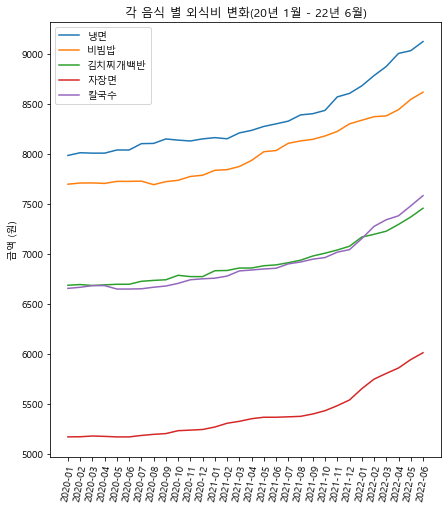

In [141]:
fig = plt.figure(figsize = (7,8))
# ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기
plt.plot(df4)
plt.ylabel('금액 (원)')
plt.xticks(df4.index, times, rotation = 80) # 눈금 지정
plt.title('각 음식 별 외식비 변화(20년 1월 - 22년 6월)')
plt.legend(df4.columns)
plt.show()

## 분석

- 전반적으로 시간이 지나면서 물가의 상승에 따라 꾸준하게 상승

In [29]:
df3 = pd.read_csv('./Data/외식산업경기동향지수_10차개정_5점척도__20220719165813.csv', encoding = 'euc_kr')

In [30]:
df3.loc[1, '외식업종별(2)'] = '한식 음식점업'
df3.loc[17, '외식업종별(2)'] = '주점업 소계'
df3.loc[22, '외식업종별(2)'] = '비알콜 음료점업'
df3.drop(index = [2,3,4,5,9,10,11,12,13,15,18,19,21,23,24], inplace= True)
df3.drop('외식업종별(1)', axis=1, inplace= True)

In [31]:
df3 = df3.transpose()
df3.rename(columns=df3.iloc[0],inplace=True)
df3 = df3.drop(df3.index[0])
df3

,소계,한식 음식점업,중식 음식점업,일식 음식점업,서양식 음식점업,치킨 전문점,간이 음식 포장 판매 전문점,주점업 소계,생맥주 전문점,비알콜 음료점업
2020.1/4,59.76,59.33,63.89,57.88,62.37,68.79,54.46,52.68,53.12,57.93
2020.2/4,64.11,63.78,73.61,65.37,66.43,67.53,60.29,56.68,57.59,61.65
2020.3/4,61.21,61.14,66.37,62.62,62.08,68.17,56.71,54.25,53.73,57.54
2020.4/4,59.33,57.26,65.62,60.06,61.13,66.91,56.51,52.13,52.03,56.14
2021.1/4,67.26,67.35,65.47,74.41,76.89,62.99,63.61,57.89,54.71,71.61
2021.2/4,69.84,69.12,69.97,75.47,74.63,69.84,71.76,59.64,57.3,75.39
2021.3/4,65.72,63.84,65.11,70.42,74.18,68.64,65.18,56.79,53.45,72.33
2021.4/4,70.34,69.83,69.35,72.01,81.45,71.07,63.15,63.18,65.09,73.95
2022.1/4,70.84,68.8,74.13,73.37,75.62,71.08,73.1,63.18,63.19,75.19
2022.2/4,85.56,84.37,80.4,87.19,93.76,75.62,81.11,92.04,103.34,89.11


In [32]:
list = []
list.append(df3.columns[0]) 
for i in range(5, 10): list.append(df3.columns[i])
list

['소계', '치킨 전문점', '간이 음식 포장 판매 전문점', '주점업 소계', '생맥주 전문점', '비알콜 음료점업']

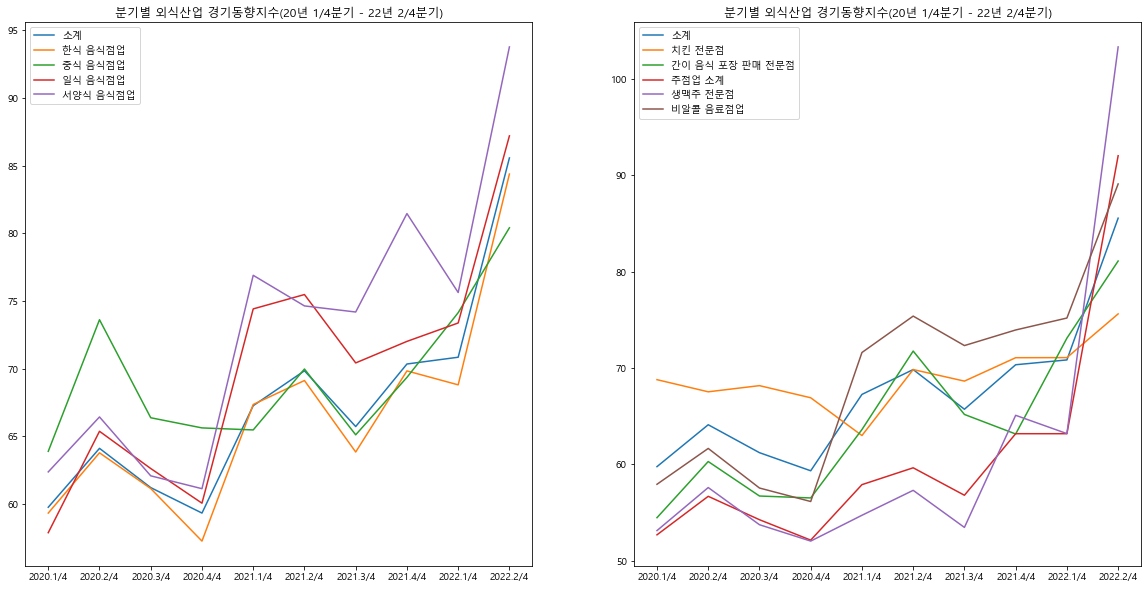

In [164]:
fig = plt.figure(figsize = (20, 10))

ax1 = fig.add_subplot(121)   # 1행 2열 중에 1번 자리에 넣기
ax1.plot(df3[['소계', '한식 음식점업', '중식 음식점업', '일식 음식점업', '서양식 음식점업']])
# ax1.set_xticks(rotation = 80)
ax1.set_title('분기별 외식산업 경기동향지수(20년 1/4분기 - 22년 2/4분기)')
ax1.legend(df3.columns)

ax2 = fig.add_subplot(122)   # 1행 2열 중에 1번 자리에 넣기
ax2.plot(df3[['소계', '치킨 전문점', '간이 음식 포장 판매 전문점', '주점업 소계', '생맥주 전문점', '비알콜 음료점업']])
# ax1.set_xticks(rotation = 80)
ax2.set_title('분기별 외식산업 경기동향지수(20년 1/4분기 - 22년 2/4분기)')
ax2.legend(list)


plt.show()

## 분석

- 사회적 거리두기 단계가 격상될 때마다 외식업 경기동향지수가 급격히 감소
    - 20년 4/4분기: 3단계 중 2 ~ 2.5단계 적용
    - 21년 3/4분기: 4단계 중 3 ~ 4단계 적용
    
    
- 급격한 증가세를 보인 22년 2/4분기 : 마스크 의무화 제외, 사회적 거리두기 전면 해제 
    - 중식, 치킨집처럼 배달 위주의 업종은 타 업종에 비해 증가세가 더뎠음
    - 주점업, 그 중에서도 생맥주 전문점들의 증가세가 최고로 높았음
        - 코로나 이전의 생활패턴 회복을 의미

In [157]:
import re
df5 = pd.read_csv('./Data/산업별 영업이익.csv', encoding='euc_kr', thousands=',')

In [158]:
df5 = df5[(df5['(코드)산업'] == '(2401)숙박·음식점') | (df5['(코드)산업'] == '(1401)음식료')]
df5

,(코드)산업,2017년,2018년,2019년,2020년,2021년,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
43,(1401)음식료,4248962,4420512.0,4342583.0,4733577.0,4918232.0,NaN,NaN,NaN,NaN
74,(2401)숙박·음식점,500670,690130.0,1067662.0,-1001046.0,22418.0,NaN,NaN,NaN,NaN


In [159]:
df5['(코드)산업'][43] = re.split('[()]', df5['(코드)산업'][43])[2]
df5['(코드)산업'][74] = re.split('[()]', df5['(코드)산업'][74])[2]
for i in range(6, 10): df5.drop(['Unnamed: ' + str(i)], axis=1, inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_3972\1991706650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['(코드)산업'][74] = re.split('[()]', df5['(코드)산업'][74])[2]


In [160]:
df5.rename(columns = {'(코드)산업':'산업'}, inplace=True)
df5.set_index('산업', inplace=True)
df5 = df5.transpose()

In [161]:
df5 = df5.astype('int64')
df5

산업,음식료,숙박·음식점
2017년,4248962,500670
2018년,4420512,690130
2019년,4342583,1067662
2020년,4733577,-1001046
2021년,4918232,22418


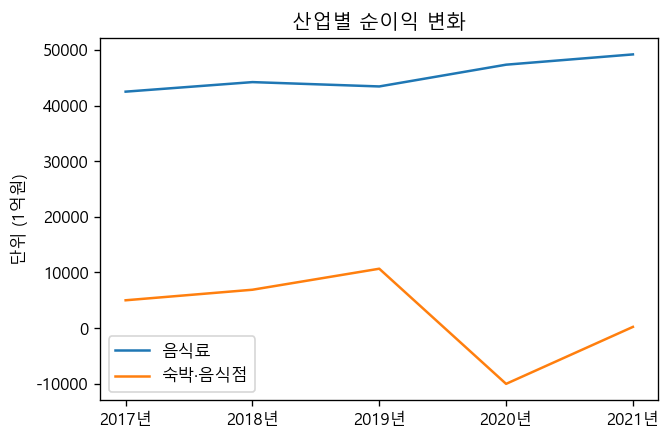

In [162]:
fig = plt.figure(dpi = 120)

plt.plot(df5)
plt.ylabel('단위 (1억원)')
plt.yticks(np.arange(-1000000, 6000000, 1000000), ('-10000', '0', '10000', '20000', '30000', '40000', '50000'))
plt.title('산업별 순이익 변화')
plt.legend(df5.columns)
plt.rc('axes', unicode_minus = False)
plt.show()

## 분석

- 국민 생활의 근간을 이루는 산업 중 하나인 음식료 산업은 증가폭이 크지 않았다.
- 코로나 시국의 직격탄을 맞은 숙박/음식점 산업은 20년 대비 급등한 물가에도 불구하고 회복을 했다. 
    - 이는 코로나 사태가 진정됨에 따라, 소비가 활성화되기 시작한 것으로 해석된다.
    - 급등한 22년 2/4분기 외식산업 경기동향지수와 연관지어 생각하면, 22년에는 조금 더 가파른 증가폭을 이룰 것이라고 예상된다.

## 결론

- 늘어나는 물가에도 불구하고, 코로나 사태 이전의 소비패턴으로 회복중인 것을 알 수 있었다.
    - 이에 따라, 요식업계도 큰 수혜를 입을 것으로 예상된다.

- 코로나 시국 시절의 배달 중심 생태계에서 벗어나고 있다는 것을 알 수 있었다.
    - 투자를 한다면, 배달 주력의 프랜차이즈보다는 홀 영업에도 강점이 있는 프랜차이즈에 투자하는 것이 좋을 것 같다.